# Importing Packages

In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
import seaborn as sns

# Importing Data

In [115]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# General insights

In [116]:
df1.shape

(13320, 9)

In [117]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


- The max bath is 40, much larger than the mean or quartiles, thus it seems to be deviant. We will explore it later during feature selection and outlier removal process.

In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


- total_sqft feature is not of int or float type, we will have to convert it.

# Exploratory Data Analysis

## Target Value Distribution

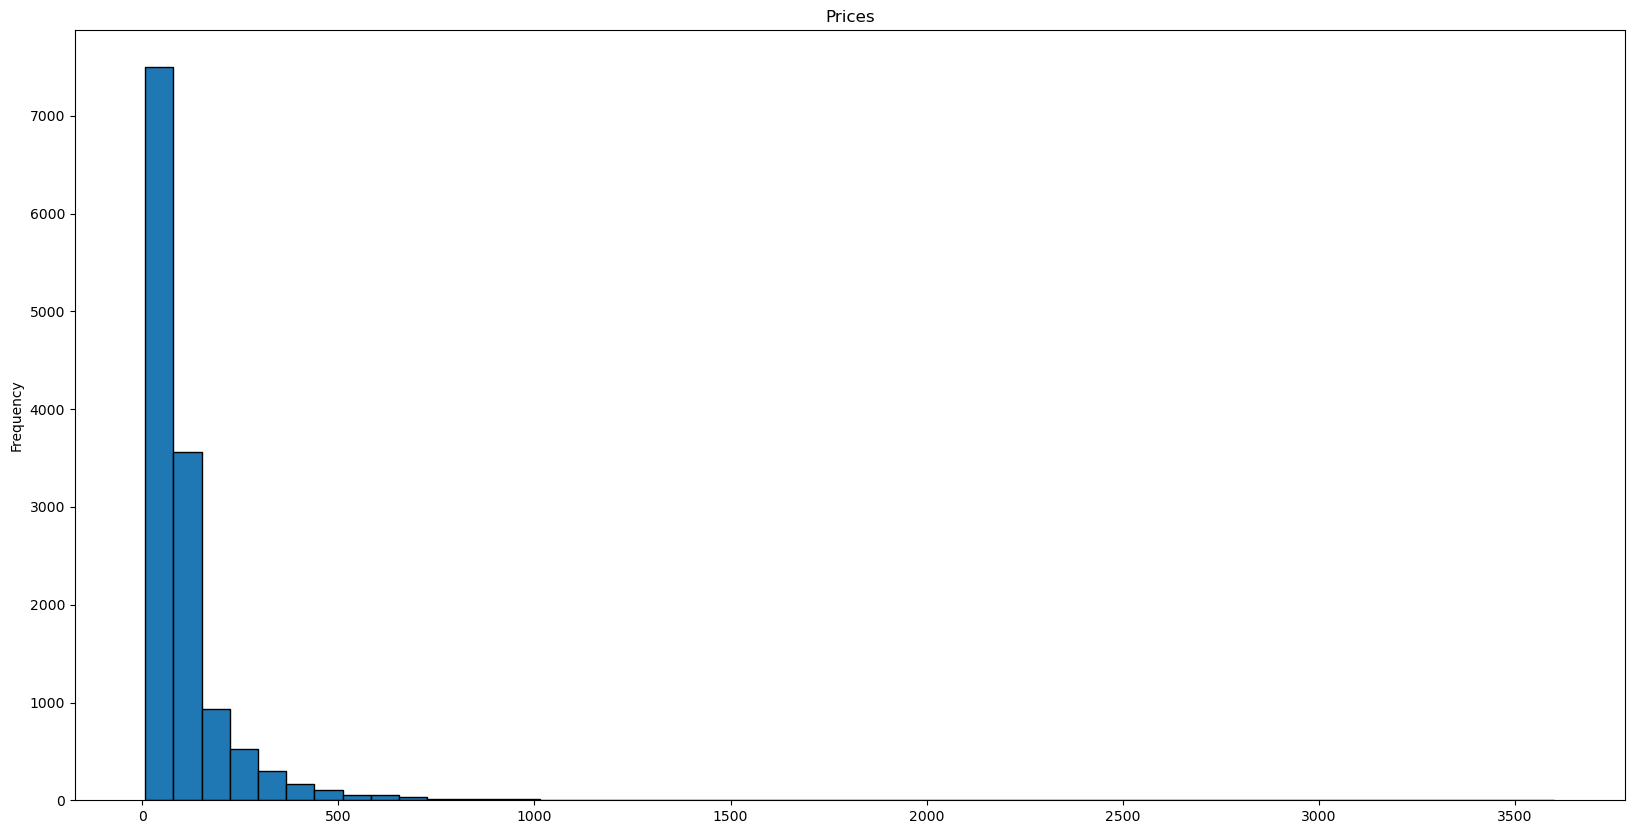

In [119]:
df1['price'].astype(int).plot.hist(edgecolor = 'k',bins=50).set_title("Prices");

- It seems most of the houses are priced well below 1000 units; very few houses are above this threshold. We will take a closer look during bivariate analysis with features.

## Examining Missing Values

In [120]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

- Apart from society, the other null values are very small fraction of total rows (above 13000), hence nulls in features other
than society can be safely dropped.

In [121]:
df1.shape

(13320, 9)

In [122]:
df1.dropna(axis=0,subset=['location','size','bath','balcony'],inplace=True)
df1.shape


(12710, 9)

In [123]:
df1.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5214
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

- We will deal later with society NA values

## Exploring features and Data Cleaning

### total_sqft

In [124]:
df1.total_sqft.unique

<bound method Series.unique of 0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13314    1715
13315    3453
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 12710, dtype: object>

In [125]:
len(df1.total_sqft)

12710

In [126]:
# This function checks if input x is a float or not

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [127]:
is_float('21 - 25')

False

In [128]:
df1[~df1['total_sqft'].apply(is_float)].size

1674

In [129]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,Rarthne,1120 - 1145,2.0,0.0,48.130
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,Toainnt,3090 - 5002,4.0,0.0,445.000
772,Super built-up Area,20-Dec,Banashankari Stage VI,2 BHK,Brens7,1160 - 1195,2.0,0.0,59.935


In [130]:
#This function converts range values to their mean

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [131]:
df2=df1.copy()

In [132]:
df2.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)

In [133]:
df2[~df2['total_sqft'].apply(is_float)].size

0

In [134]:
len(df2.total_sqft)

12710

In [135]:
df2['total_sqft'][410]

nan

In [136]:
df2.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5214
total_sqft        42
bath               0
balcony            0
price              0
dtype: int64

- The function has introduced some null values in total sqft feature, we will drop the rows as the no. is very small in comparison
with total rows.


In [137]:
df2.shape

(12710, 9)

In [138]:
df2.dropna(axis=0,subset=['total_sqft'],inplace=True)
df2.shape

(12668, 9)

In [139]:
df2.describe()

,total_sqft,bath,balcony,price
count,12668.000000,12668.000000,12668.000000,12668.000000
mean,1511.835167,2.616277,1.585649,105.952648
std,1162.097276,1.223882,0.816758,131.813137
min,5.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,49.015000
50%,1260.000000,2.000000,2.000000,70.000000
75%,1640.000000,3.000000,2.000000,115.000000
max,52272.000000,40.000000,3.000000,2912.000000


#### Univariate Analysis of total sqft

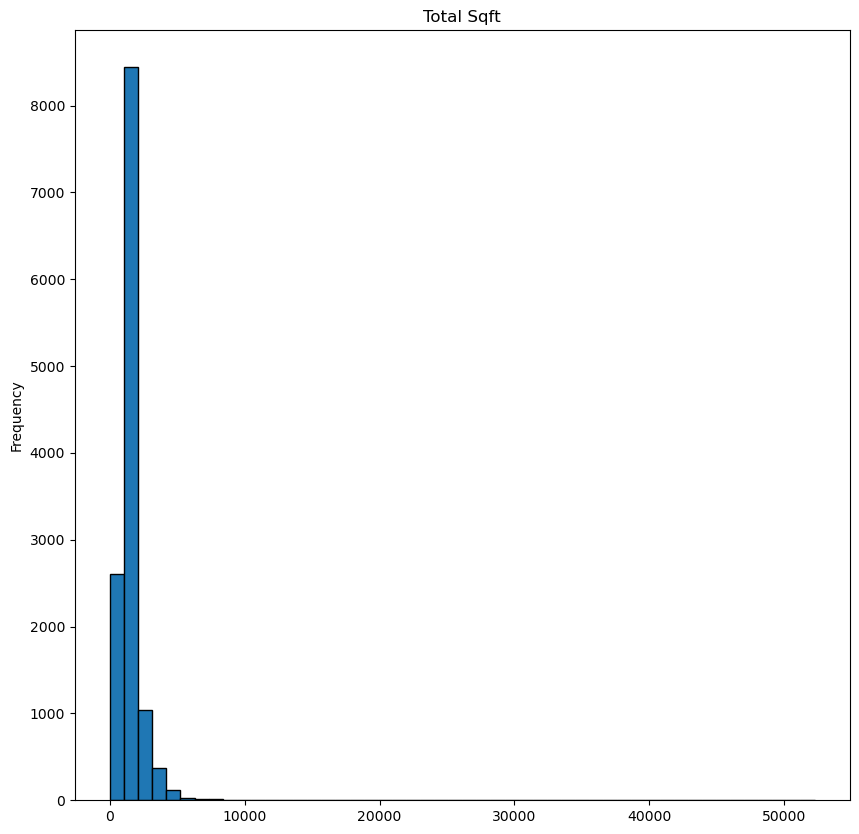

In [140]:
matplotlib.rcParams['figure.figsize']=(10,10)
df2['total_sqft'].plot.hist(edgecolor = 'k',bins=50).set_title("Total Sqft");

- It seems that total sqft follows a similar distribution as prices; We will confirm this suspicion using scatter plots and correlations

#### Bivariate analysis of total sqft

In [141]:
df2['total_sqft'].corr(df2['price'])

0.5585554366599383

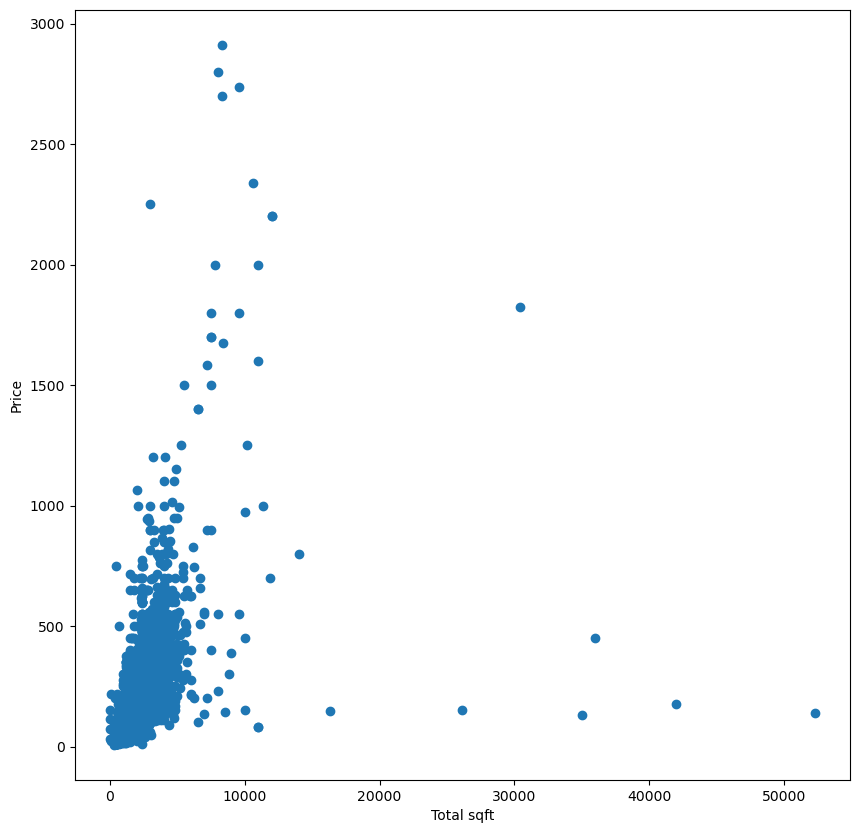

In [142]:
plt.scatter(df2.total_sqft,df2.price)
plt.xlabel('Total sqft')
plt.ylabel('Price');

- We can now be certain that there is a moderately strong correlation between total sqft and price.

### Size

In [143]:
df2.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00


In [30]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [31]:
df2.describe()

,total_sqft,bath,balcony,price,bhk
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000
mean,1511.835167,2.616277,1.585649,105.952648,2.736422
std,1162.097276,1.223882,0.816758,131.813137,1.202643
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,49.015000,2.000000
50%,1260.000000,2.000000,2.000000,70.000000,3.000000
75%,1640.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


#### Univariate Analysis

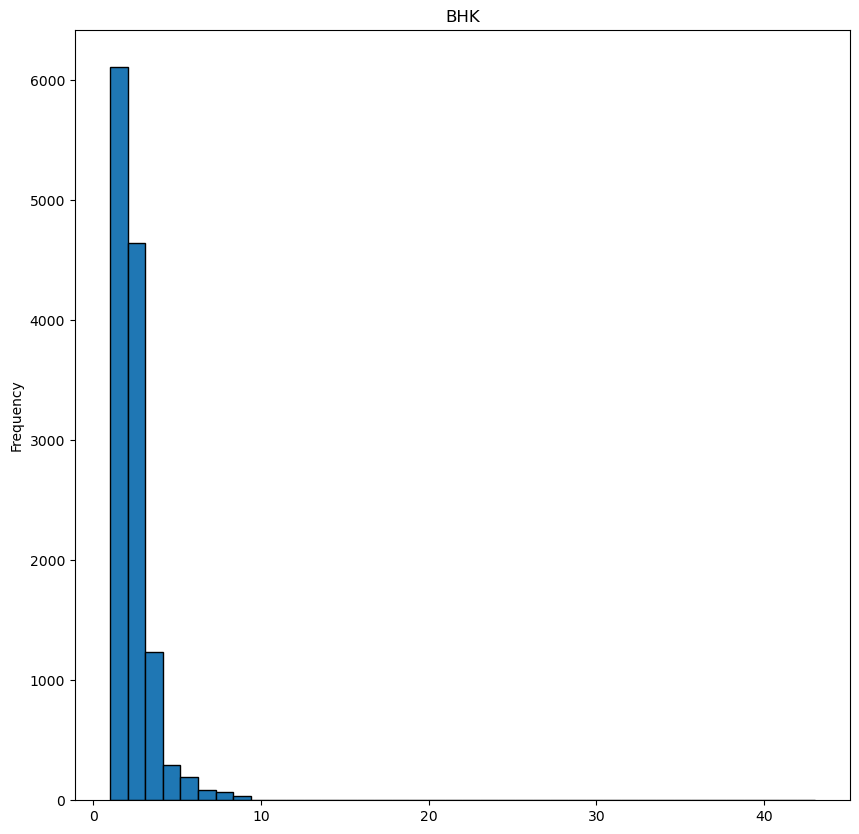

In [32]:
df2['bhk'].plot.hist(edgecolor = 'k',bins=40).set_title("BHK");

- It seems that very few flats have above 10 bhk, lets look at them

In [33]:
df2[df2.bhk >10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
459,Super built-up Area,Ready To Move,1 Giri Nagar,11 BHK,Bancyri,5000.0,9.0,3.0,360.0,11
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,NaN,8000.0,27.0,0.0,230.0,27
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,NaN,1200.0,11.0,0.0,170.0,11
3853,Plot Area,Ready To Move,1 Annasandrapalya,11 Bedroom,NaN,1200.0,6.0,3.0,150.0,11
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400.0,40.0,0.0,660.0,43
4916,Super built-up Area,Ready To Move,1Channasandra,14 BHK,NaN,1250.0,15.0,0.0,125.0,14
6533,Plot Area,Ready To Move,Mysore Road,12 Bedroom,NaN,2232.0,6.0,2.0,300.0,12
9935,Super built-up Area,Ready To Move,1Hoysalanagar,13 BHK,NaN,5425.0,13.0,0.0,275.0,13


- At this stage, it seems that bhk 27 and 43 are outliers; we will explore such readings further when removing outliers using domain knowledge.

#### Bivariate Analysis

In [34]:
df2['bhk'].corr(df2['price'])

0.40664509442161717

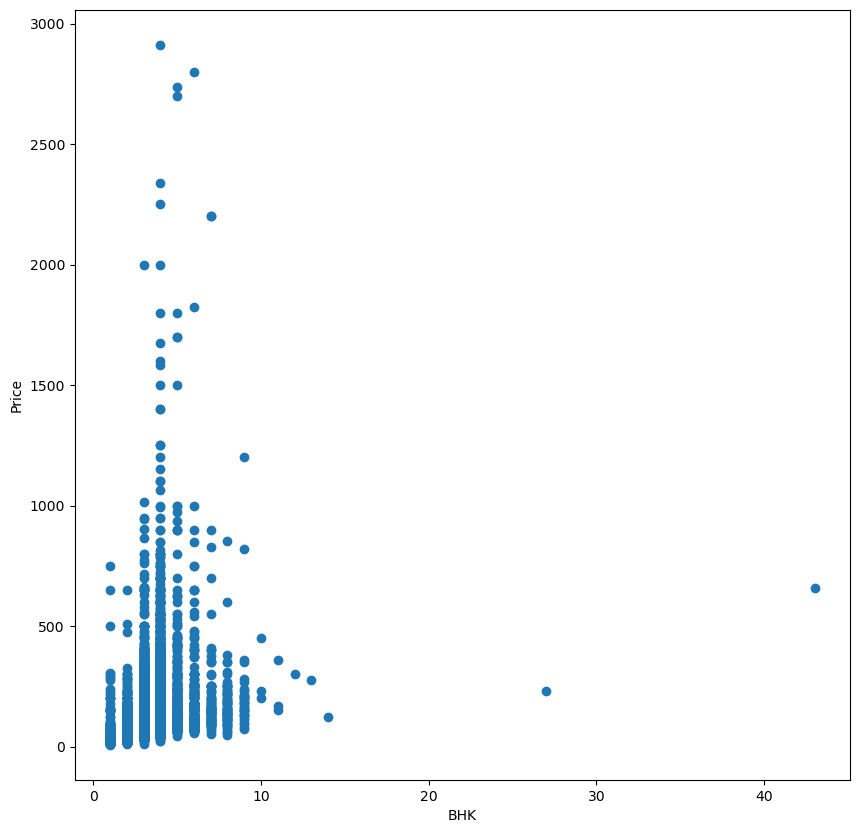

In [35]:
plt.scatter(df2.bhk,df2.price)
plt.xlabel('BHK')
plt.ylabel('Price');

- There is a moderate correlation between price and bhk 

In [36]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2


# At this stage,lets look at the correlation between the numerical features and target.

In [37]:
correlations = df2.corr()['price'].sort_values()
correlations

balcony       0.120407
bhk           0.406645
bath          0.459320
total_sqft    0.558555
price         1.000000
Name: price, dtype: float64

- Balcony has a low correlation with target variable, lets explore this feature.

### Balcony

In [38]:
df2.balcony.unique()

array([1., 3., 2., 0.])

#### Univariate Analysis

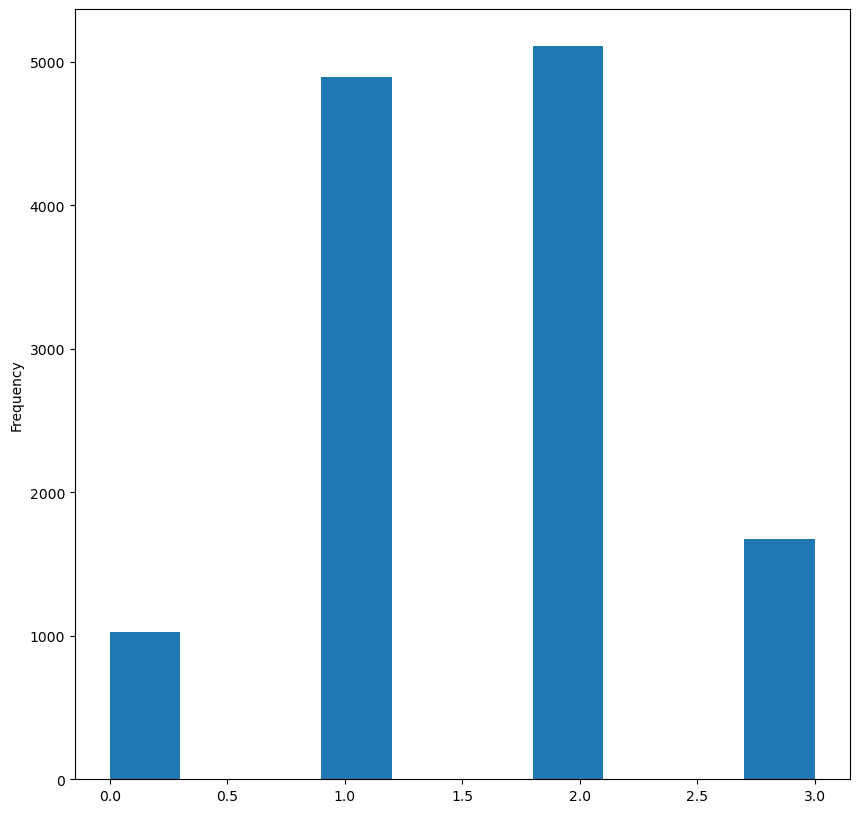

In [39]:
df1['balcony'].plot.hist();

#### Bivariate Analysis

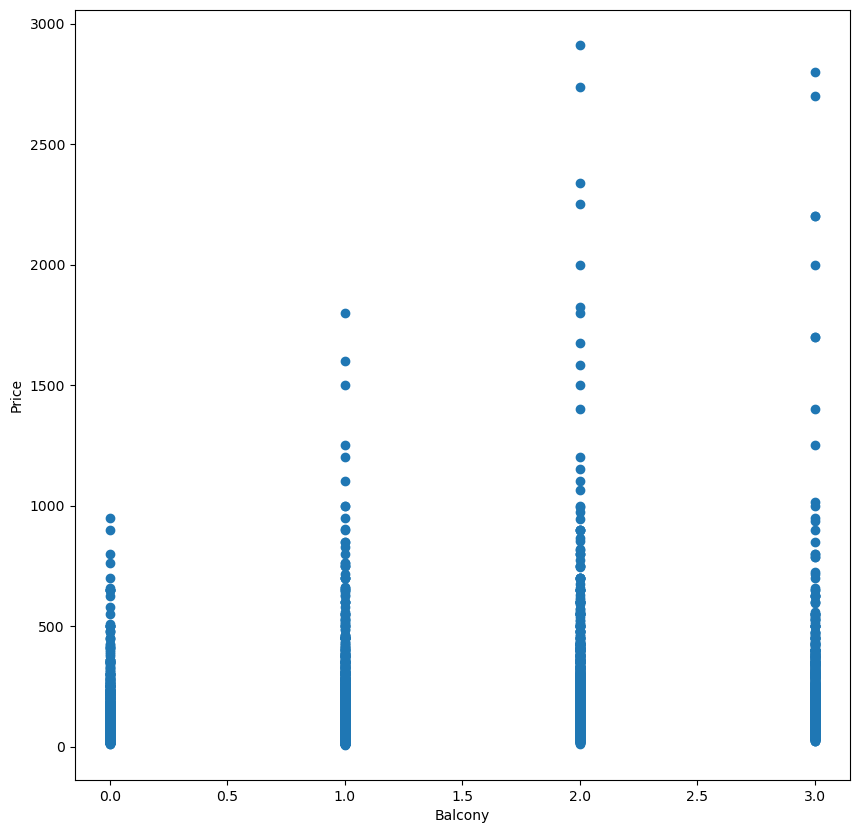

In [40]:
plt.scatter(df2.balcony,df2.price)
plt.xlabel('Balcony')
plt.ylabel('Price');

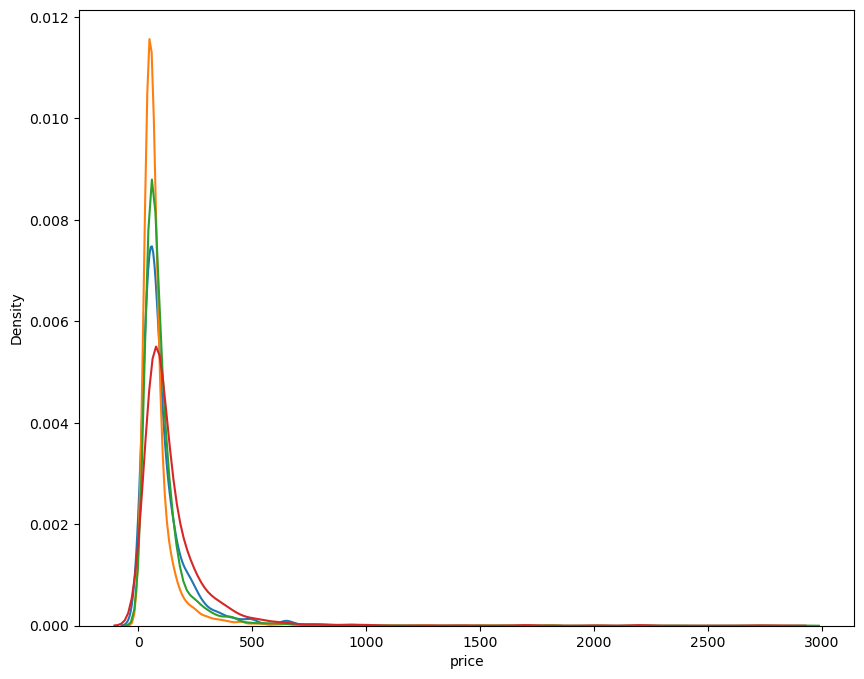

In [41]:
plt.figure(figsize = (10, 8))

# KDE plot of prices for different balcony no.
sns.kdeplot(df2.loc[df1['balcony'] == 0, 'price'] , label = 'balcony == 0');
sns.kdeplot(df2.loc[df1['balcony'] == 1, 'price'] , label = 'balcony == 1');
sns.kdeplot(df2.loc[df1['balcony'] == 2, 'price'] , label = 'balcony == 2');
sns.kdeplot(df2.loc[df1['balcony'] == 3, 'price'] , label = 'balcony == 3');

The balcony feature can be dropped as it has very low correlation with target. This is further emphasized by the kde plots.

In [42]:
df2.groupby('balcony')['price'].median().sort_values(ascending=False)

balcony
3.0    95.0
2.0    75.0
0.0    72.0
1.0    60.0
Name: price, dtype: float64

In [43]:
df2.price.median()

70.0

In [44]:
df3=df2.copy()

In [45]:
df3=df3.drop(['balcony'], axis=1)

In [46]:
df3.shape

(12668, 9)

In [47]:
df3.head()

,area_type,availability,location,size,society,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,51.00,2


### Bath

In [48]:
df_heat=df3[['total_sqft','bath','bhk','price']]

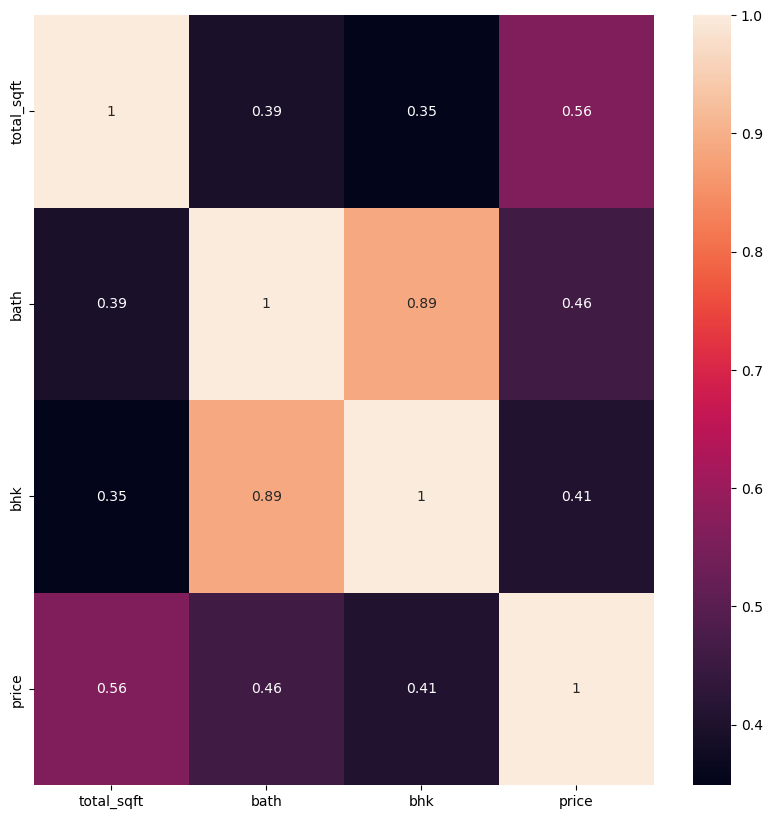

In [49]:
sns.heatmap(df_heat.corr(), annot=True);

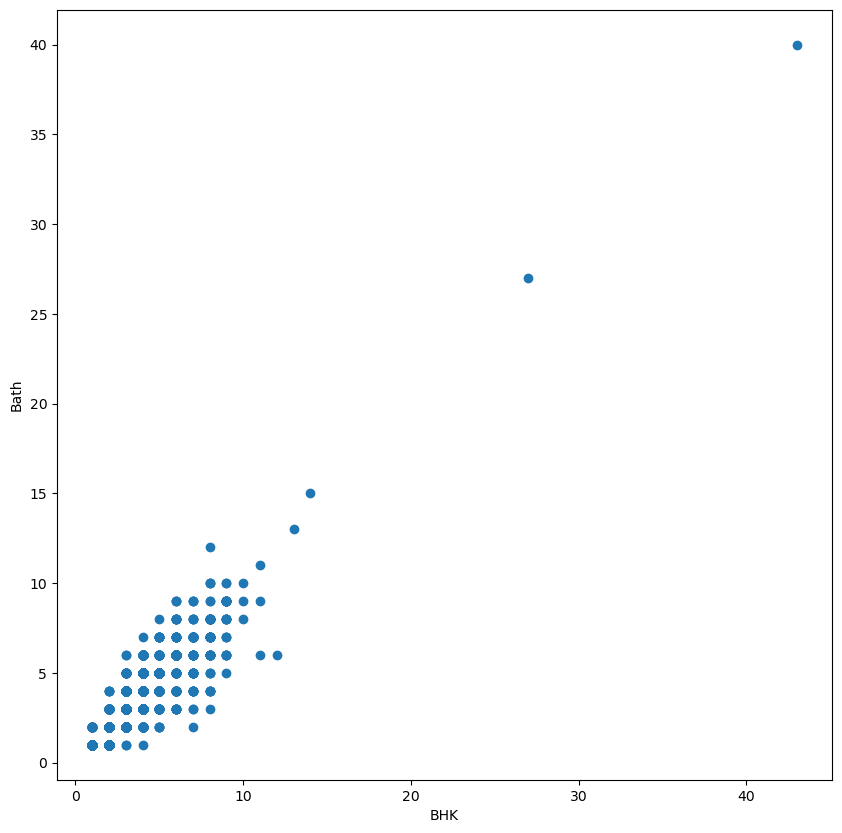

In [50]:
plt.scatter(df2.bhk,df2.bath)
plt.xlabel('BHK')
plt.ylabel('Bath');

- It seems that bath and bhk are strongly correlated. We might drop one incase of bad model performance. We will keep both of them for now.

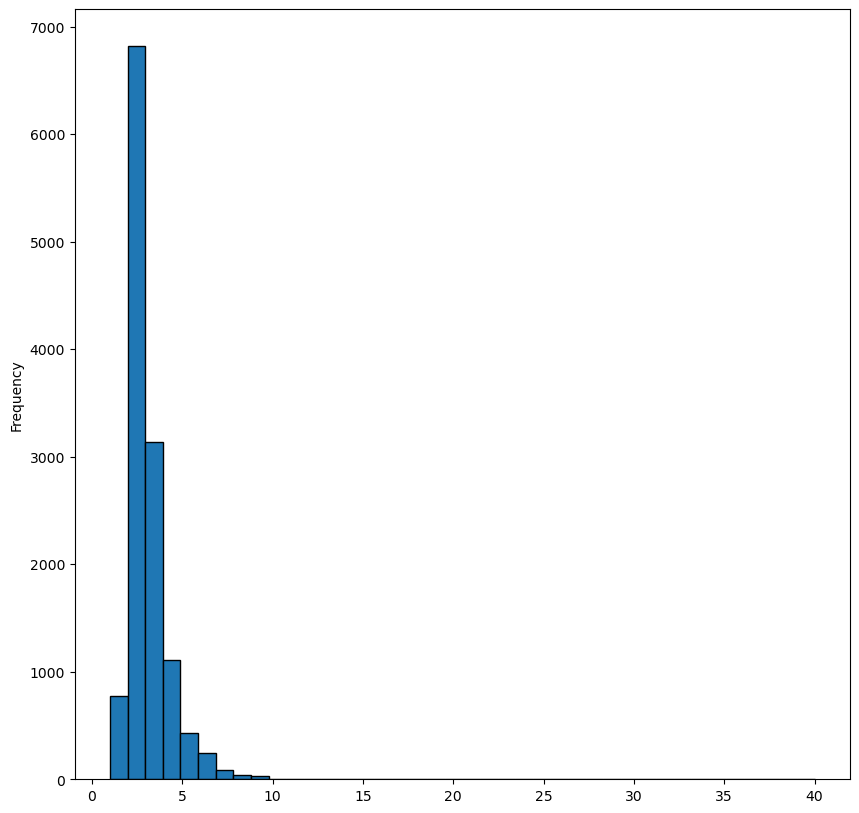

In [51]:
df3['bath'].plot.hist(edgecolor = 'k', bins=40);

# Outlier Removal Using Business Logic

For this project it is assumed that normal square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft). For example a 2 bhk 400 sqft apartment seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft.

In [52]:
df3[(df3.total_sqft/df3.bhk)<300].head()

,area_type,availability,location,size,society,total_sqft,bath,price,bhk
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,NaN,1407.0,4.0,150.0,6
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,NaN,1350.0,7.0,85.0,8
70,Plot Area,Ready To Move,Double Road,3 Bedroom,NaN,500.0,3.0,100.0,3
78,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,NaN,460.0,1.0,22.0,2
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,NaN,710.0,6.0,160.0,6


In [53]:
df3.shape

(12668, 9)

In [54]:
df4 = df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape

(12013, 9)

# Feature Addidtion

Lets check if price per sqft data could be useful

In [55]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,availability,location,size,society,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,51.00,2,4250.000000


### Location categorical variable

In [56]:
df5.location.unique().size

1182

In [57]:
df5.location.size

12013

Location is inducing a high dimensionality problem; we cannot use ohe directly.

In [58]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.location.value_counts(ascending=False)
location_stats

Whitefield               513
Sarjapur  Road           369
Electronic City          294
Kanakpura Road           257
Thanisandra              232
                        ... 
BEML Layout 5th stage      1
Kannur                     1
singapura paradise         1
Gattigere                  1
Abshot Layout              1
Name: location, Length: 1172, dtype: int64

In [59]:
len(location_stats[location_stats>10])

219

# Dimensionality Reduction

We will tag any location with less tha 10 rows as 'other' location

In [60]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Nagappa Reddy Layout     10
Judicial Layout          10
Basapura                 10
Dairy Circle             10
Giri Nagar               10
                         ..
BEML Layout 5th stage     1
Kannur                    1
singapura paradise        1
Gattigere                 1
Abshot Layout             1
Name: location, Length: 953, dtype: int64

In [61]:
len(df5.location.unique())

1172

In [62]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

220

# Outlier Removal using mean and standard deviation

It is assumed that central limit theorem holds for the case.

In [63]:
df6=df5.copy()

In [64]:
df6.shape

(12013, 10)

In [65]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [66]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9880, 10)

#### Note that above we have used 1 standard deviation interval from mean to test for outliers. This is so as it has been iterated using 2 sde's in previous runs and a drop of score was noted.

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

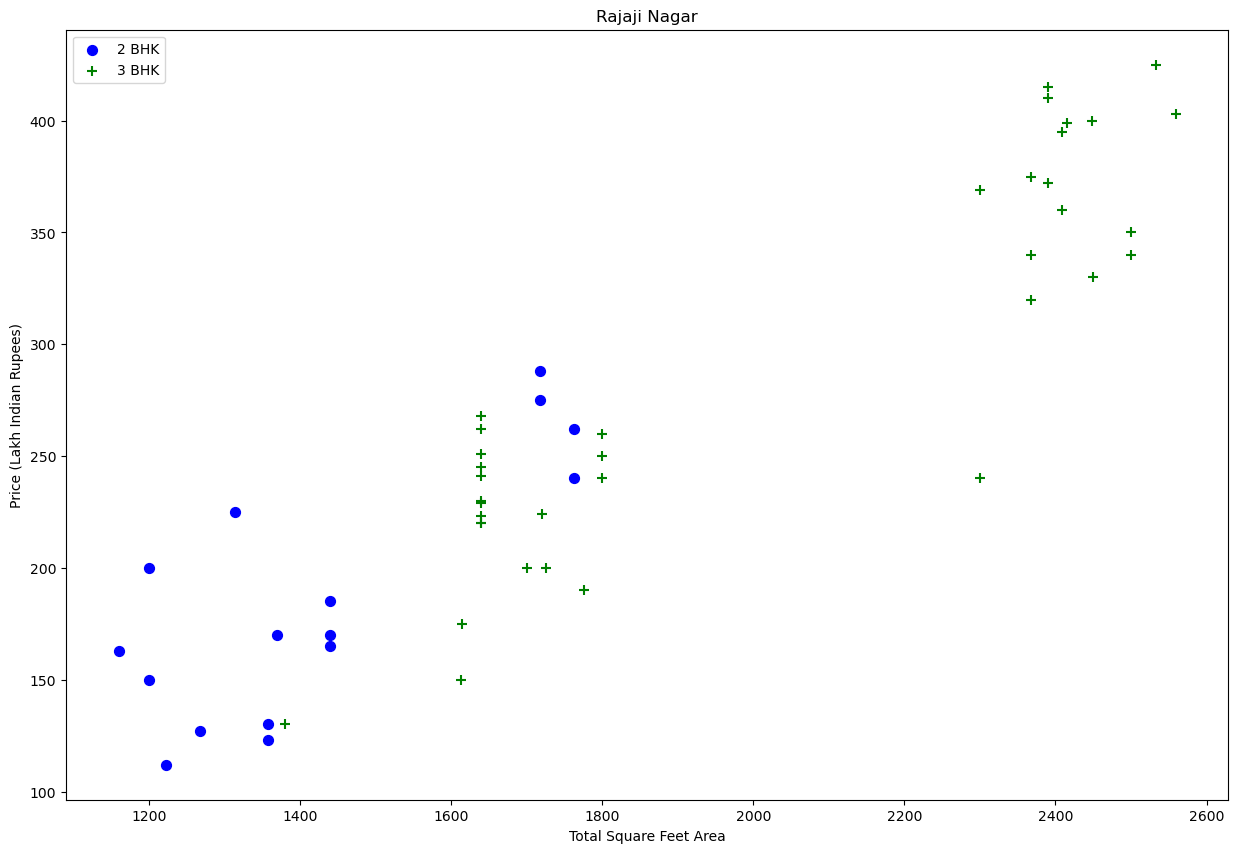

In [67]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

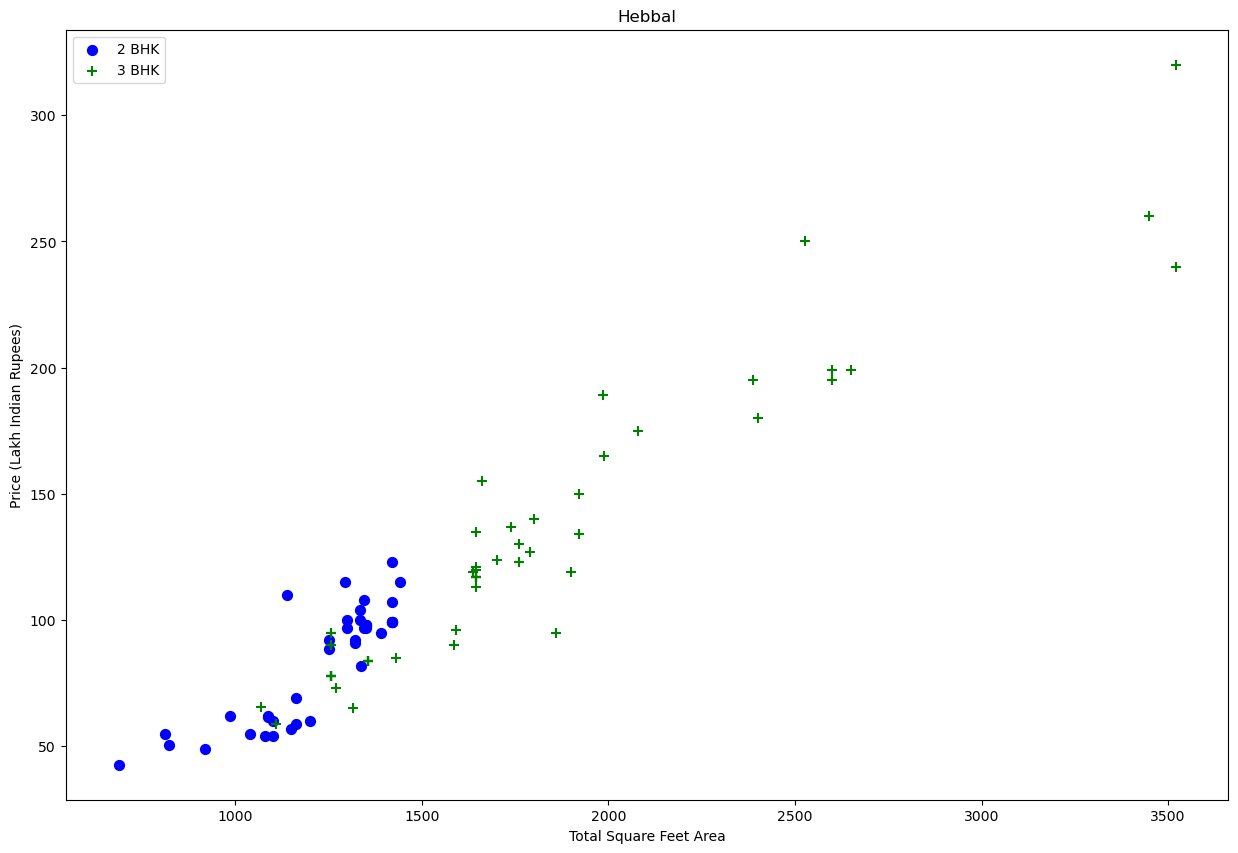

In [68]:
plot_scatter_chart(df7,"Hebbal")

In [69]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft)
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(5854, 10)

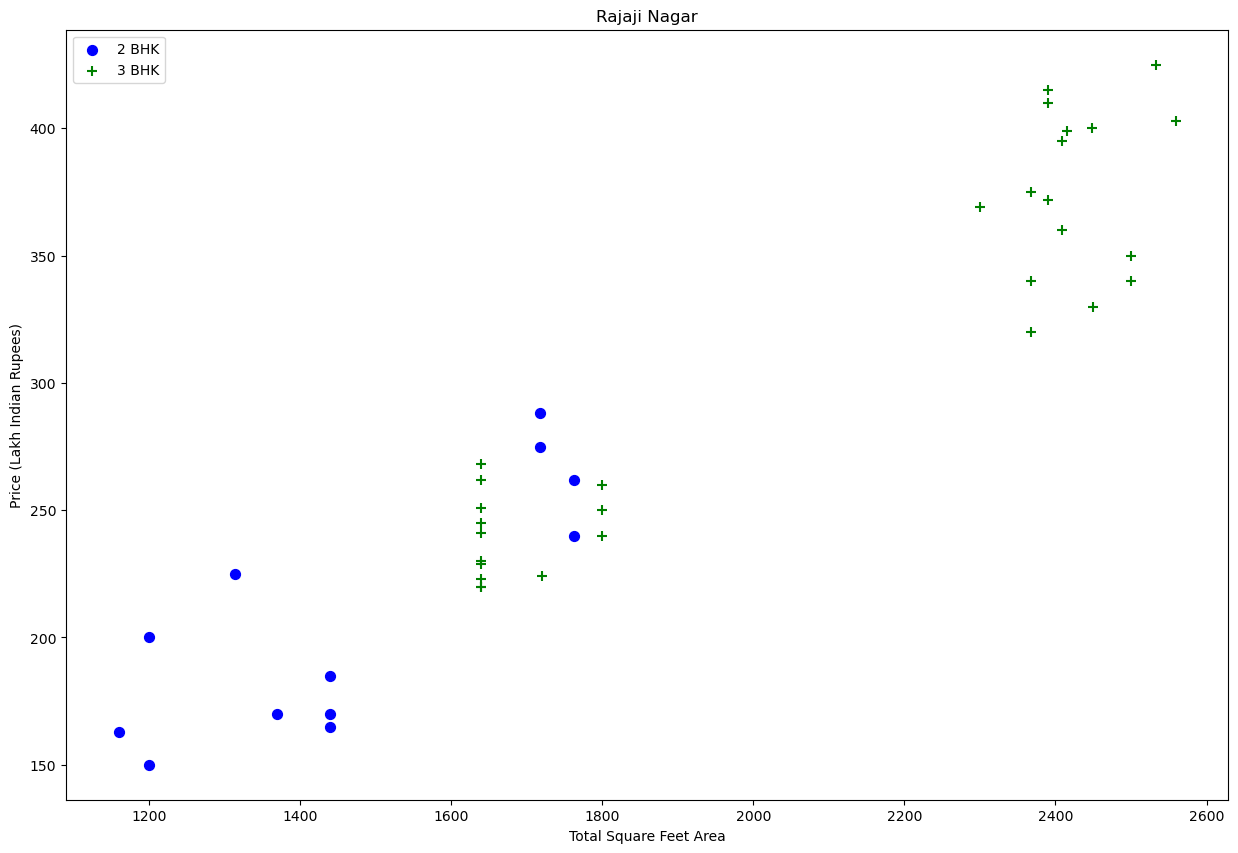

In [70]:
plot_scatter_chart(df8,"Rajaji Nagar")

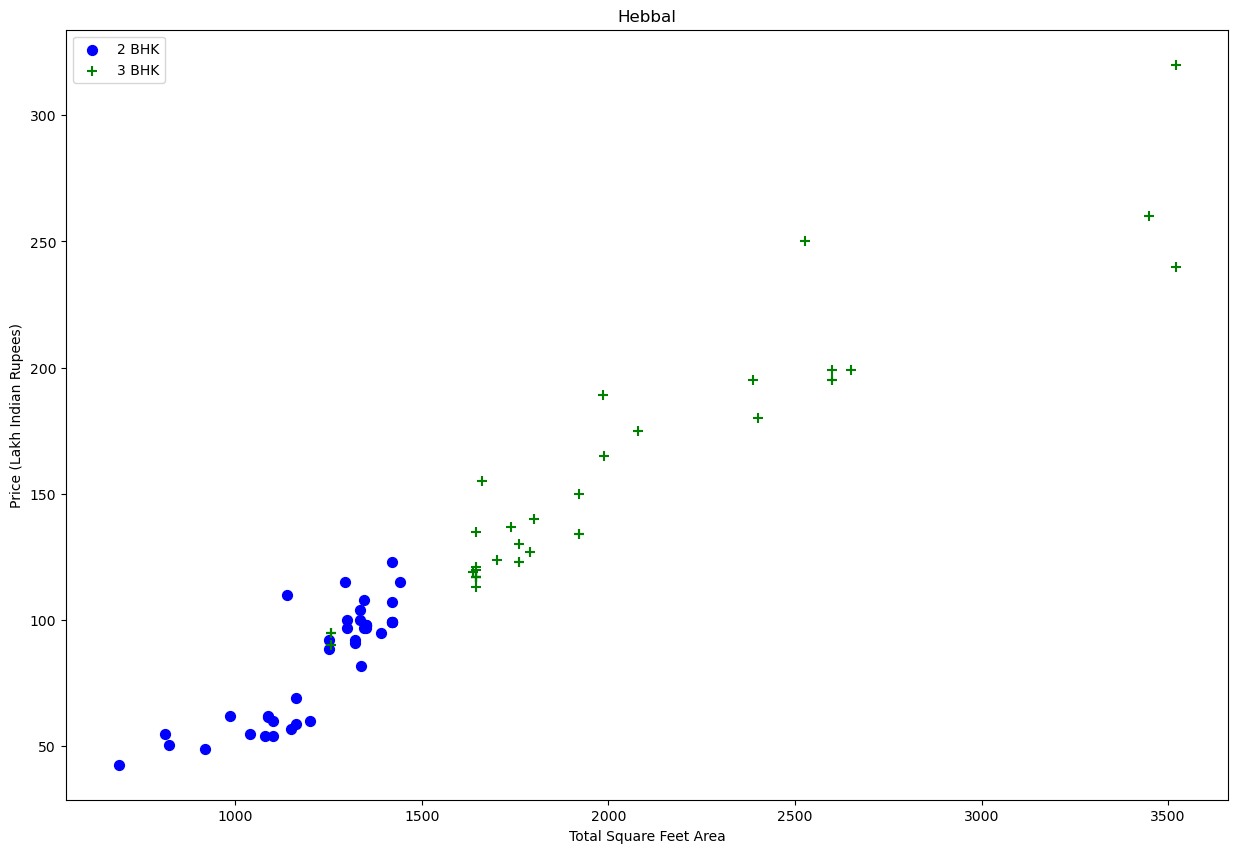

In [71]:
plot_scatter_chart(df8,"Hebbal")

# Outlier Removal Using Bathrooms Feature

In [72]:
df8.bath.unique()

array([ 3.,  4.,  2.,  1.,  5.,  6.,  8.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

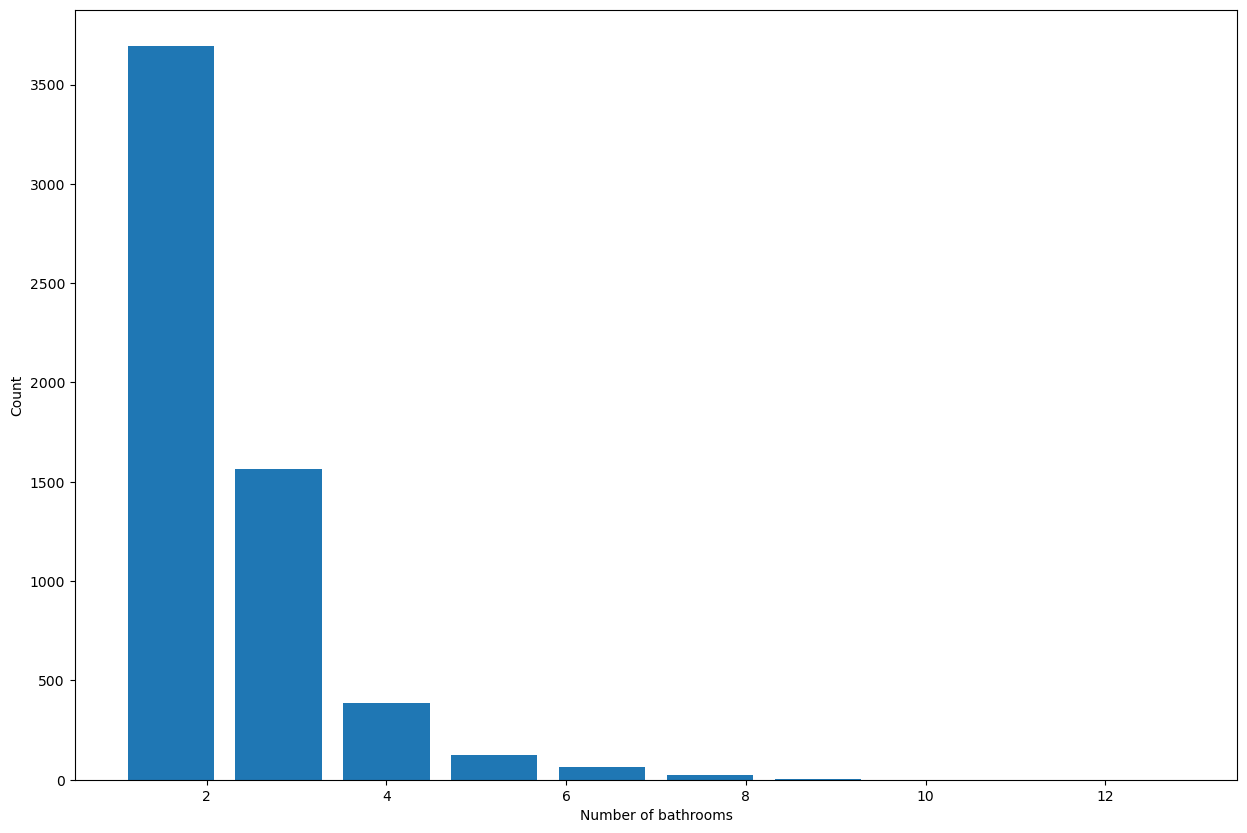

In [73]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [74]:
df8[df8.bath>10]

,area_type,availability,location,size,society,total_sqft,bath,price,bhk,price_per_sqft
9265,Super built-up Area,Ready To Move,other,13 BHK,NaN,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [75]:
df8[df8.bath>df8.bhk+2]

,area_type,availability,location,size,society,total_sqft,bath,price,bhk,price_per_sqft
6364,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Soitya,1806.0,6.0,116.0,3,6423.034330
8013,Super built-up Area,Ready To Move,other,6 BHK,Prowshi,11338.0,9.0,1000.0,6,8819.897689


In [76]:
df7.shape

(9880, 10)

In [77]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(5792, 10)

In [78]:
df9.head(2)

,area_type,availability,location,size,society,total_sqft,bath,price,bhk,price_per_sqft
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,167.0,3,8906.666667
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,2065.0,4.0,210.0,3,10169.491525


# Adjusting availability

In [79]:
df9.groupby('availability')['availability'].count()

availability
15-Dec              1
15-Jun              1
16-Dec              3
16-Jul              1
16-Mar              1
                 ... 
22-Jun              1
22-Mar              2
22-May              1
22-Nov              2
Ready To Move    4565
Name: availability, Length: 68, dtype: int64

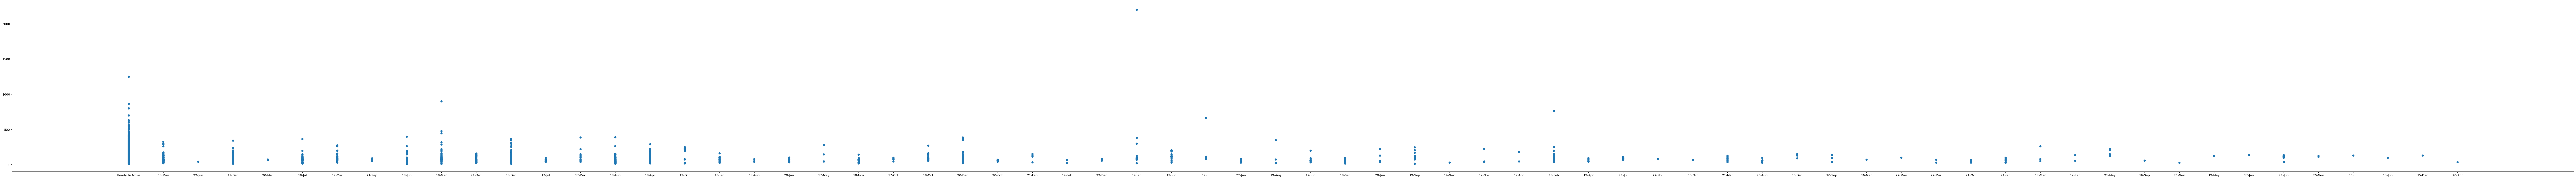

In [80]:
matplotlib.rcParams['figure.figsize']=(150,10)
plt.scatter(df9.availability,df9.price);

In [81]:
df9[df9.availability == 'Ready To Move'].shape

(4565, 10)

In [82]:
df10 = df9.copy()
df10["immediately_available"] = df9.availability.apply(lambda x: int(x=='Ready To Move'or x=='Immediate Possession'))
df10.head(10)

,area_type,availability,location,size,society,total_sqft,bath,price,bhk,price_per_sqft,immediately_available
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,167.0,3,8906.666667,1
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,2065.0,4.0,210.0,3,10169.491525,1
3,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,2059.0,3.0,225.0,3,10927.634774,1
4,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,100.0,2,7173.601148,1
5,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,93.0,2,8635.097493,0
6,Plot Area,Ready To Move,1st Phase JP Nagar,2 Bedroom,NaN,1566.0,2.0,180.0,2,11494.252874,1
7,Built-up Area,Ready To Move,1st Phase JP Nagar,1 BHK,Opamaan,840.0,2.0,50.0,1,5952.380952,1
8,Super built-up Area,18-May,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,131.0,3,8238.993711,0
9,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,2180.0,3.0,210.0,3,9633.027523,1
10,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NaN,1180.0,2.0,88.5,2,7500.000000,1


In [83]:
df10.shape

(5792, 11)

## Society

In [84]:
df10.society.isnull().sum()

1951

In [85]:
df10.groupby('society')['society'].agg('count').sort_values()

society
NStusD      1
Pao 2Sm     1
Paoliy      1
PaownNe     1
Pardsri     1
           ..
PrarePa    43
Prarkun    43
Bhmesy     43
Prtates    44
GMown E    53
Name: society, Length: 1412, dtype: int64

We will drop this feature as:
- Most values here are null
- Many societies linked with only one location
- High end houses hav null society value and hence it cant account for its variation.

In [86]:
df1[(df1.price>1000)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
605,Super built-up Area,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.0
743,Super built-up Area,Ready To Move,Cunningham Road,4 BHK,NaN,5270,4.0,3.0,1250.0
1299,Plot Area,Ready To Move,Chamrajpet,9 Bedroom,NaN,4050,7.0,1.0,1200.0
1311,Super built-up Area,Ready To Move,D Souza Layout,3 BHK,Niateki,4634,4.0,3.0,1015.0
2286,Plot Area,Ready To Move,Kathreguppe,4 Bedroom,NaN,3200,4.0,2.0,1200.0
3164,Plot Area,Ready To Move,Malleshwaram,4 Bedroom,NaN,5500,5.0,1.0,1500.0
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.0
4963,Super built-up Area,19-Jan,Malleshwaram,5 BHK,NaN,7500,7.0,3.0,1700.0
5711,Plot Area,18-Apr,2nd Block Jayanagar,4 Bedroom,NaN,4920,5.0,2.0,1150.0


In [87]:
df10.head(3)

,area_type,availability,location,size,society,total_sqft,bath,price,bhk,price_per_sqft,immediately_available
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,167.0,3,8906.666667,1
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,2065.0,4.0,210.0,3,10169.491525,1
3,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,2059.0,3.0,225.0,3,10927.634774,1


In [88]:
df11 = df10.drop(['availability','society','size','price_per_sqft'],axis='columns')
df11.head(3)

,area_type,location,total_sqft,bath,price,bhk,immediately_available
1,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3,1
2,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3,1
3,Super built-up Area,1st Phase JP Nagar,2059.0,3.0,225.0,3,1


# Use One Hot Encoding For Location

In [89]:
dummies = pd.get_dummies(df11.location)
dummies.head(3)

,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df12 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head()

,area_type,location,total_sqft,bath,price,bhk,immediately_available,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1st Phase JP Nagar,2059.0,3.0,225.0,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,1st Phase JP Nagar,1077.0,2.0,93.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df13 = df12.drop('location',axis='columns')
df13.head(2)

,area_type,total_sqft,bath,price,bhk,immediately_available,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Super built-up Area,1875.0,3.0,167.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,2065.0,4.0,210.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# One Hot Encoding For area_type

In [92]:
df13.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          1036
Carpet  Area              36
Plot  Area               525
Super built-up  Area    4195
Name: area_type, dtype: int64

In [93]:
area_type_dummies = pd.get_dummies(df13.area_type)
area_type_dummies

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
...,...,...,...,...
9869,0,0,0,1
9871,0,1,0,0
9872,0,0,0,1
9876,0,0,0,1


In [94]:
area_type_dummies = area_type_dummies.iloc[:,0:-1]
area_type_dummies

,Built-up Area,Carpet Area,Plot Area
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
...,...,...,...
9869,0,0,0
9871,0,1,0
9872,0,0,0
9876,0,0,0


In [95]:
df14 = pd.concat([df13,area_type_dummies], axis = 1)
df14.head()

,area_type,total_sqft,bath,price,bhk,immediately_available,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
1,Super built-up Area,1875.0,3.0,167.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,2065.0,4.0,210.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,2059.0,3.0,225.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1394.0,2.0,100.0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,1077.0,2.0,93.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df15 = df14.drop('area_type',axis='columns')
df15.head(2)

,total_sqft,bath,price,bhk,immediately_available,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
1,1875.0,3.0,167.0,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,210.0,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building a Model

In [97]:
X = df15.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,immediately_available,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
1,1875.0,3.0,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2059.0,3.0,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X.shape

(5792, 226)

In [99]:
y = df15.price
y.head(3)

1    167.0
2    210.0
3    225.0
Name: price, dtype: float64

In [100]:
len(y)

5792

### Train test split

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [102]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8536333066511428

In [103]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87403712, 0.86953118, 0.79534562, 0.85083053, 0.86971214])

# Find best model using GridSearchCV

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.851891,{'normalize': True}
1,lasso,0.706995,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.722732,"{'criterion': 'mse', 'splitter': 'random'}"


based on above results we can say that LinearRegression gives the best score. Hence we will use that.

# Test the model for few properties

In [105]:
def predict_price(area_type, Immediately_availabile, location, bhk, sqft, bath):    
    loc_index = np.where(X.columns==location)[0][0]
    area_type_index = np.where(X.columns==area_type)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    availability = lambda x : int(x=='yes')
    x[4] = availability(Immediately_availabile)
    if loc_index >= 0:
        x[loc_index] = 1
    if area_type_index >= 0:
        x[area_type_index] = 1

    return lr_clf.predict([x])[0]

In [106]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'immediately_available',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar',
       ...
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area'],
      dtype='object', length=226)

In [107]:
predict_price('Carpet  Area', 'yes','1st Phase JP Nagar',2, 1000, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.82703129449935

In [108]:
predict_price('Carpet  Area', 'yes','Indira Nagar',2, 1000, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


213.71254336963108

# Export the tested model to a pickle file

In [110]:
import pickle
with open('banglore_homeprices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [111]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
 }
with open("columns.json","w") as f:
    f.write(json.dumps(columns))